# **Lab 3**

### Question:
#### Write a python program to build a neural network model with different learning models.

### Solution:

#### Import and Libraries and Data

In [1]:
from functools import reduce
import logging
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

logging.basicConfig(filename = "lab3.log", level = logging.INFO)

In [2]:
df = pd.read_csv('iris.data')
df.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


#### Data Pre-Processing

In [3]:
def target_converter(Lable):
    # To change class lable into numerial variable
    A = []
    output = []
    x = 0
    # Append value if not present in A
    for i in Lable:
        if (i not in A):
            A.append(i)
            x += 1
    # Increase Count If Present in A
    for i in Lable:
        x = A.index(i)
        output.append(x)
        
    return(np.array(output))

In [4]:
X = np.array(df)[:,0:4]
X[:5]

array([[4.9, 3.0, 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5.0, 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4]], dtype=object)

In [5]:
Y = np.array(df)[:,4]
Y = target_converter(Y)
Y[:5]

array([0, 0, 0, 0, 0])

#### Transfer Function and Error

In [6]:
# Sigmoid(Log Sigmoidal) transfer function
def sigmoid(n):
    return 1/(1+np.exp(-n))

# Misclassification Error
def error(val,tar):
    if val == tar:
        return 0
    
    else:
        return 1

In [7]:
len(Y)

149

In [8]:
def multiClassConverter(target):
    # Converting Targets to Multiclass Labels (0 -> [1, 0, 0], 1 -> [0, 1, 0] etc.) 
    val = list(set(target))
    val.sort()
    out_dict = {}
    n = len(val)
    # Creating dictionary object by using keys as targets and values as Multiclass Labels 
    for i in range(n):
        l = [0] * n
        l[i] = 1
        out_dict[val[i]] = l
    return out_dict

T = multiClassConverter(Y)
T

{0: [1, 0, 0], 1: [0, 1, 0], 2: [0, 0, 1]}

#### Neural Network Architecture

Neural Network with 4 input and 3 output layer, sigmoid as transfer function and mean error as valuation parameter, leanring over different lerning algorithms.

Learning Algorithms includes:

* Hebbian Learning

* Perceptron Learning

* Delta Learning

* Least Mean Square Learning

In [31]:
class neural_net:

    def __init__(self,x,y,epoch,alpha,learning) -> None:
        '''Learning : hebb - Hebbian Learning, per - Perceptron, delta - Delta Learning, lms - Least Mean Square Learning.'''
        self.x = x
        self.y = y
        self.epoch = epoch
        self.alpha = alpha
        self.learning = learning


    def neural_learning(self,w,err,pat,ao,net) -> np.array:
        # Return updeted weights as per learning rule
        if err == 0:
            return w
        
        else:
            if self.learning == 'hebb':
                try:
                    if err > 0:
                        w = w + self.alpha * ao * pat
                    else:
                        w = w - self.alpha * ao * pat

                    return w
                except Exception as e:
                    logging.error(e)

            elif self.learning == 'per':
                try:
                    w = w + self.alpha * pat
                    return w

                except Exception as e:
                    logging.error(e)
            
            elif self.learning == 'delta':
                try:
                    # Derivative of Sogmoidal function
                    sig_der = sigmoid(net)*(1 - sigmoid(net))
                    w = w + self.alpha * err * sig_der * pat

                    return w
                except Exception as e:
                    logging.error(e)

            elif self.learning == 'lms':
                try:
                    w = w + 2 * self.alpha * err * pat
                    return w

                except Exception as e:
                    logging.error(e)
            else:

                logging.error('Wrong Input')
                raise Exception('Wrong Input')
            

    def nn(self):
        # Total and Mean Error
        tot_err = []
        mean_err = []
        # All the updeted weignts of each iteration for every epoch
        w_new = []
        # Loop through n(Epoch) number of times
        for eph in range(self.epoch):
            # Error List for each Epoch
            err_list = []


            for i in range(len(self.y)):
                # For each iteration actual output list
                ao_list = []

                # Getting weights of previous epochs 
                if len(w_new) >= len(self.y):
                    w = w_new[eph*len(self.y) + i - len(self.y)]
                    
                else:
                # Rangdomly Generated Weight
                    w = np.random.rand(3,4)

                # Logging the weight matrices output for debugging
                logging.info('Epoch :' + str(eph)+' Iteration : ' + str(i) + 'Old w:' + str(w))


                net = np.dot(self.x[i],w.T)

                # Actual output List for each iteration
                for n in net:
                    ao = sigmoid(n)
                    ao_list.append(ao)

                # Using Multiclass Converter to convert targets into multiclass numeriacl labels
                T = multiClassConverter(Y)
                tar = T[self.y[i]]
                error_array = np.array(tar) - np.array(ao_list)

                # Root Mean Square Error
                err = np.mean(error_array)
                mean_ao = np.mean(np.array(ao_list))
                mean_net = np.mean(np.array(net))

                # Learning
                w = self.neural_learning(w,err,self.x[i],mean_ao,mean_net)
                w_new.append(w)

                # Logging the new weight matrices output for debugging
                logging.info('New w:' + str(w))

                # Error and mean Error of every iteration
                err_list.append(err)
                ms_err = reduce(lambda x,y: (x**2 + y**2)/2 ,err_list)
            
            tot_err.append(err_list)
            mean_err.append(ms_err)

        # Plot Variables
        fig = plt.figure(figsize=plt.figaspect(.3))
        if self.learning == 'hebb':
            fig.suptitle('Hebbian Learning (Learning Rate:{alpha})'.format(alpha = self.alpha))

        elif self.learning == 'per':
            fig.suptitle('Perceptron Learning (Learning Rate:{alpha})'.format(alpha = self.alpha))
        
        elif self.learning == 'delta':
            fig.suptitle('Delta Learning (Learning Rate:{alpha})'.format(alpha = self.alpha))
        
        elif self.learning == 'lms':
            fig.suptitle('Least Mean Square learning Learning (Learning Rate:{alpha})'.format(alpha = self.alpha))
        


        # 3D Plot of RMS Error
        ax = fig.add_subplot(1, 2, 1, projection='3d')
        # X and Y axis for plotting
        x_axis = np.arange(1,len(self.y) + 1,step = 1)
        y_axis = np.arange(1,self.epoch + 1,step = 1)
        # Using Meshgrid for generating 2D Matrices of X and Y axis
        X_Axis, Y_Axis = np.meshgrid(x_axis,y_axis)
        z_axis = np.array(tot_err)
        
        # Plotting 3D Scatter Plot
        ax.scatter3D(X_Axis,Y_Axis,z_axis, c = z_axis)
        ax.set_xlabel('Pattern')
        ax.set_ylabel('Epoch')
        ax.set_zlabel('Error')
        plt.title('Mean Error')

        # 2D Plot of Mean of RMS
        ax = fig.add_subplot(1, 2, 2)
        ep = np.arange(1,self.epoch + 1,step = 1)
        ax.plot(ep,mean_err)
        ax.set_xlabel('Epoch')
        ax.set_ylabel('Mean Squear of Mean Error')
        plt.show()



#### Hebbian Learning:

* Information is stored in the connections between neurons in neural networks, in the form of weights.

* Weight change between neurons is proportional to the product of activation values for neurons.

    $\Delta w 	\propto xy => \Delta w = \alpha xy$ 
    
    ($x$ is pattern, $y$ is actual output and $\alpha$ is learning rate)

* As learning takes place, simultaneous or repeated activation of weakly connected neurons incrementally changes the strength and pattern of weights, leading to stronger connections.

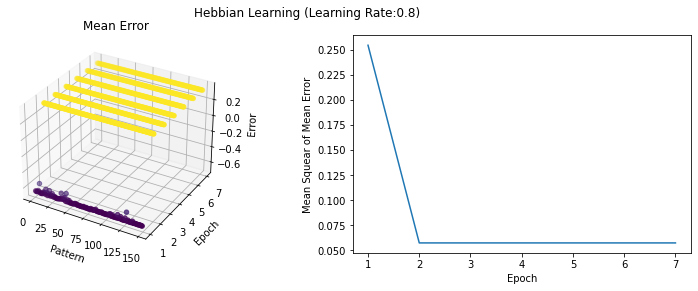

In [32]:
hebbian = neural_net(X,Y,7,0.8,'hebb')
hebbian.nn()

#### Perceptron Learning

* Initialize the weights. Weights may be initialized to 0 or to a small random value.

* For each example training set, update the weight modification:

    $ w_{new} = w_{old} + \alpha t x$

    (where $t$ is 1 for positive error and -1 for negetive and $\alpha$ is learning rate)


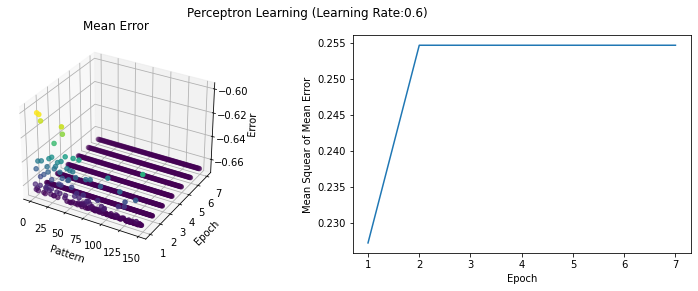

In [33]:
perceptron = neural_net(X,Y,7,0.6,'per')
perceptron.nn()

#### Delta rule


For a neuron $j$ with activation function $g(x)$, the delta rule for neuron $j'$ s $i$ th weight $w_{ji}$ is given by

$\Delta w_{ji} = \alpha (t_{j} - y_{j}) g'(h_{j}) x_{i}$,
where

$ \alpha $ is a small constant called learning rate

$ g(x)$ is the neuron's activation function

$ g'$ is the derivative of {\displaystyle g}g

$ t_{j}$ is the target output

$ h_{j}$ is the weighted sum of the neuron's inputs

$ y_{j}$ is the actual output

$x_{i}$ is the  $i$ th input

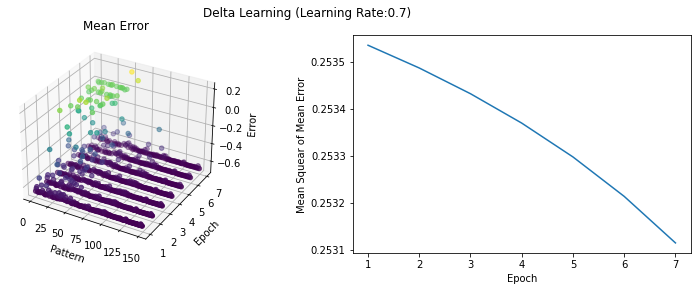

In [35]:
delta = neural_net(X,Y,7,0.7,'delta')
delta.nn()

#### Least Mean Square learning Learning

The updated weight for LMS algorithm is given by

$ w(k+1)=w(k)+ 2\alpha *e(k)* p(k)$

where
$e(k)$ is error and $p(k)$ is pattern of $k$ th iteration.



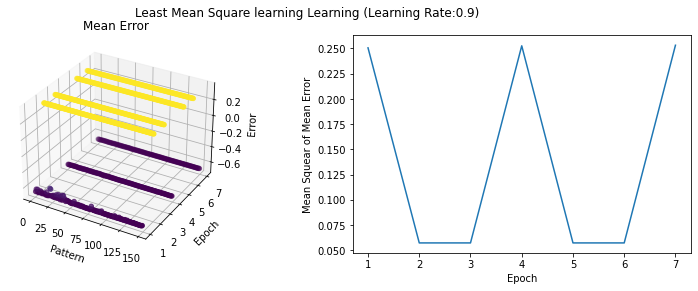

In [36]:
lms = neural_net(X,Y,7,0.9,'lms')
lms.nn()